In [73]:
import archetypes as arch
import numpy as np
from archetypes.datasets import make_archetypal_dataset

shape = (100, 100)

archetypes_shape = (3, 3)

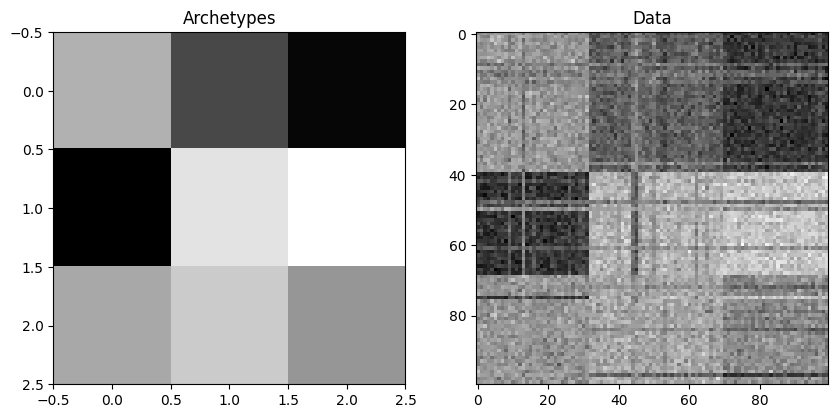

In [74]:
import torch

# generate archetypes
generator = np.random.default_rng(0)

archetypes = generator.uniform(size=archetypes_shape)

data, true_labels = make_archetypal_dataset(archetypes, shape, alpha=0.05, noise=0.1)
data = torch.tensor(data, dtype=torch.float32)

# plot archetypes and data

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(archetypes, cmap="gray")
ax[0].set_title("Archetypes")

ax[1].imshow(data, cmap="gray")
ax[1].set_title("Data")

plt.show()


In [75]:

aa_model_0 = arch.torch.AA(archetypes_shape[0], shape[0], shape[1])
_ = aa_model_0.train(data.T, n_epochs=4_000)

aa_model_1 = arch.torch.AA(archetypes_shape[1], shape[1], shape[0])
_ = aa_model_1.train(data, n_epochs=4_000)

biaa_model = arch.torch.BiAA(archetypes_shape, shape[0], shape[1])
biaa_model.train(data.T, n_epochs=4_000)


Epoch 3999/4000 | loss 96.5507: 100%|██████████| 4000/4000 [00:08<00:00, 488.63it/s]
Epoch 3999/4000 | loss 96.2257: 100%|██████████| 4000/4000 [00:07<00:00, 501.39it/s]
Epoch 3999/4000 | loss 96.1288: 100%|██████████| 4000/4000 [00:12<00:00, 323.87it/s]


In [81]:
aa_betas_0 = aa_model_0.B
aa_betas_1 = aa_model_1.B.T

aa_archetypes = (aa_betas_0 @ data @ aa_betas_1).detach().numpy()

# clip values to [0, 1]
aa_archetypes = np.clip(aa_archetypes, 0, 1)

In [82]:
biaa_archetypes = biaa_model.Z.detach().numpy()

# clip values to [0, 1]
biaa_archetypes = np.clip(biaa_archetypes, 0, 1)

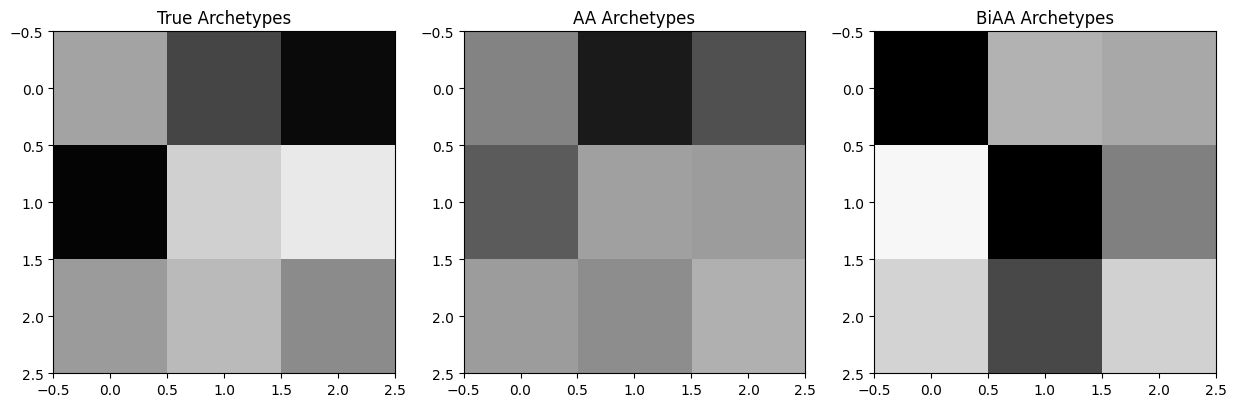

In [117]:
# plot reconstructed archetypes
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(archetypes, cmap="gray", vmin=0, vmax=1)
ax[0].set_title("True Archetypes")

ax[1].imshow(aa_archetypes, cmap="gray", vmin=0, vmax=1)
ax[1].set_title("AA Archetypes")

ax[2].imshow(biaa_archetypes, cmap="gray", vmin=0, vmax=1)
ax[2].set_title("BiAA Archetypes")

plt.show()

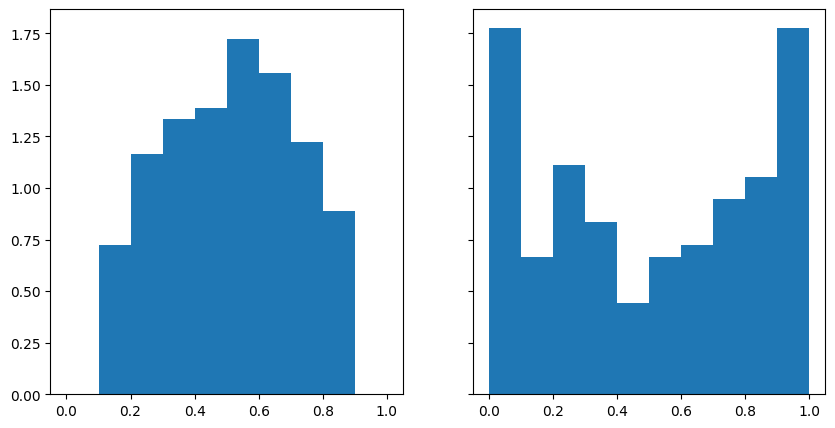

In [125]:
# load files
aa_values = np.load("aa_values.npy")
biaa_values = np.load("biaa_values.npy")

# make a plot with the archetypes values with 5 bins
# the plot should share the same y axis scale and x axis scale for all plots

bins = 10

fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True, sharex=True)

ax[0].hist(aa_values, bins=bins, range=(0, 1), density=True)
ax[1].hist(biaa_values, bins=bins, range=(0, 1), density=True)

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


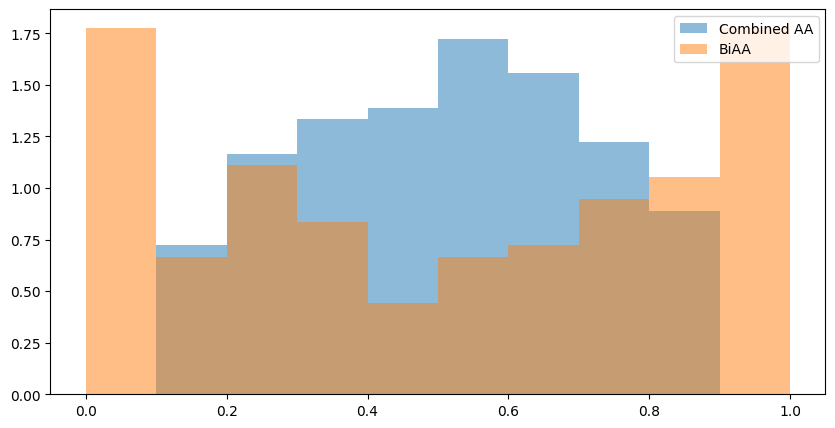

In [129]:
# combine both histograms into a single plot

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.hist(aa_values, bins=bins, range=(0, 1), density=True, alpha=0.5, label="Combined AA")
ax.hist(biaa_values, bins=bins, range=(0, 1), density=True, alpha=0.5, label="BiAA")

ax.legend()

# save fig to pdf and eps

plt.savefig("dist-archetypes.pdf")
plt.savefig("dist-archetypes.eps")


plt.show()
